In [1]:
import pandas as pd
import numpy as np
import os
import random
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, MaxAbsScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.figure(figsize=(15, 12))
scaler = "pwrtrnsf"


<Figure size 1080x864 with 0 Axes>

In [2]:
from itertools import islice

wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"data_scaled_lof_{scaler}_scaler"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df = pd.DataFrame(data, index=idx, columns=cols)
df

,ent,adv_curr_acc_disc_doc_loans,asset_tot_asset,dep_cap_assets,deriv_assets,exp_dep_cap_loans,implied_lending_rate,implied_liable_rate,implied_spread,liquidity_ratio,...,loans_cap_assets,loans_cap_to_banks_assets,net_int_inc_tot_income,net_worth_assets,pers_cred_card_loans,roe,serv_rev_tot_inc,titles_assets,LOF,outlier
0,7,0.479974,1.447610,-0.075250,0.526584,1.031837,0.209237,-0.561528,0.327970,-0.839672,...,-0.286916,-1.437251,-0.044942,-1.278785,0.267063,-0.405912,-0.048173,-0.412044,-1.009548,1
2,14,0.192441,1.455569,0.672501,-0.011052,0.775045,-0.392551,-0.195327,0.259357,-1.019011,...,-0.637132,-1.619275,0.166592,-1.566792,0.281773,-0.037058,0.380001,1.168224,-0.983069,1
3,15,-0.072197,1.359626,0.420766,0.012049,0.352789,-0.212399,0.316080,-0.103359,-0.466461,...,-0.081602,-1.223397,-0.063048,-1.047122,-0.223863,-0.475484,-0.093488,-0.143674,-0.985937,1
4,16,0.691579,1.355807,0.336580,-0.807819,0.497060,-0.575696,0.703499,-1.106963,-0.227986,...,0.140619,-1.257161,-0.084110,-0.752201,0.259050,-0.714994,-0.106386,-0.331028,-0.978321,1
5,17,0.005216,1.428956,0.719067,-0.032067,1.038349,-0.070775,-0.049797,2.428894,-0.535491,...,-0.058661,-1.397099,-0.026672,-0.782161,0.046602,0.080174,-0.051744,-0.091137,-1.053562,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,44098,-1.558623,-0.549228,-1.410576,-0.174540,0.896784,-0.880101,-0.815407,0.378852,0.458539,...,1.754457,1.490124,-0.098142,0.985525,-1.348395,0.505212,-0.029575,-0.151737,-1.157405,1
67,44099,-1.430619,-0.762254,-1.292705,-0.174540,-0.277528,0.077843,-0.949970,0.523888,-0.027916,...,0.716195,1.506843,-0.099093,0.583914,-1.348672,-0.024844,-0.106165,-1.968950,-1.077608,1
68,45056,-1.236722,-1.150931,1.413610,-0.174540,-0.680240,1.379165,-0.761336,-1.029590,-0.658086,...,0.545254,-0.064378,-0.012708,-0.567159,1.366443,-0.034051,-0.055242,-0.646910,-1.148176,1
69,45072,1.572423,-1.513034,-0.243061,-0.174540,-0.721283,-0.065900,0.040539,0.078790,1.155216,...,0.010356,0.545315,-0.079258,0.532218,-0.984557,-0.450607,-0.070273,-0.771535,-1.068859,1


In [3]:
from itertools import islice

# scaler = "robust"
wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"{scaler}_scaler_pca_2d"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_pca_2d = pd.DataFrame(data, index=idx, columns=cols)
df_pca_2d = df_pca_2d[df_pca_2d["outlier"]==1]
df_pca_2d

,ent,LOF,outlier,pca1,pca2
0,7,-1.009548,1,-2.372899,-0.870349
2,14,-0.983069,1,-3.158148,-0.233948
3,15,-0.985937,1,-2.013455,-0.244069
4,16,-0.978321,1,-2.209461,-0.110692
5,17,-1.053562,1,-2.056106,-1.151394
...,...,...,...,...,...
66,44098,-1.157405,1,2.279681,-0.706081
67,44099,-1.077608,1,2.685221,-1.003716
68,45056,-1.148176,1,-0.152235,-2.454286
69,45072,-1.068859,1,1.769910,1.400621


In [4]:
from itertools import islice

# scaler = "robust"
wb = openpyxl.load_workbook("output/pca.xlsx")
data = wb[f"{scaler}_scaler_pca_3d"].values
cols = next(data)[1:]
data = list(data)
idx = [r[0] for r in data]
data = (islice(r, 1, None) for r in data)
df_pca_3d = pd.DataFrame(data, index=idx, columns=cols)
df_pca_3d = df_pca_3d[df_pca_3d["outlier"]==1]
df_pca_3d

,ent,LOF,outlier,pca1,pca2,pca3
0,7,-1.009548,1,-2.372899,-0.870349,0.084811
2,14,-0.983069,1,-3.158148,-0.233948,0.465202
3,15,-0.985937,1,-2.013455,-0.244069,0.165702
4,16,-0.978321,1,-2.209461,-0.110692,-0.061650
5,17,-1.053562,1,-2.056106,-1.151394,0.837572
...,...,...,...,...,...,...
66,44098,-1.157405,1,2.279681,-0.706081,2.448785
67,44099,-1.077608,1,2.685221,-1.003716,1.155121
68,45056,-1.148176,1,-0.152235,-2.454286,-0.999465
69,45072,-1.068859,1,1.769910,1.400621,-0.804375


In [5]:
data_arr = df[df.columns[1:-2]].to_numpy()
display(data_arr.shape)
display(data_arr[:,0:1].shape)
data_arr_2d = df_pca_2d[df_pca_2d.columns[-2:]].to_numpy()
display(data_arr_2d.shape)
display(data_arr_2d[:,0:1].shape)

(64, 18)

(64, 1)

(64, 2)

(64, 1)

In [19]:
kmeans=KMeans(init="random", n_init=100, max_iter=10000, algorithm="elkan")
kmeans.get_params()["algorithm"]

'elkan'

DETERMINING THE NUMBER OF CLUSTERS IN A DATA SET

ELBOW METHOD - KMEANS

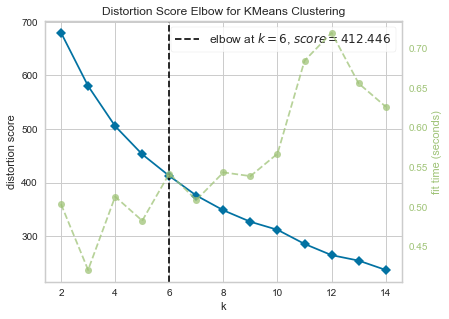

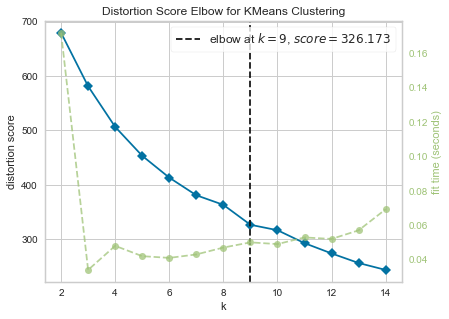

'visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure\n\nvisualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure'

In [6]:
'''distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=100, max_iter=10000) # , algorithm="elkan")
    kmeanModel.fit(data_arr)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()'''

kmeans_visualizer1 = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15))
kmeans_visualizer1.fit(data_arr)        # Fit the data to the visualizer
kmeans_visualizer1.show()        # Finalize and render the figure

kmeans_visualizer2 = KElbowVisualizer(KMeans(), k=(2,15))
kmeans_visualizer2.fit(data_arr)        # Fit the data to the visualizer
kmeans_visualizer2.show()        # Finalize and render the figure

'''visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure'''

[4, 5, 6, 7, 8, 9, 10]

For n_clusters = 4 The average silhouette_score is : 0.2352223207593646
For n_clusters = 5 The average silhouette_score is : 0.18872212139091113
For n_clusters = 6 The average silhouette_score is : 0.20520810872843032
For n_clusters = 7 The average silhouette_score is : 0.21084738009258508
For n_clusters = 8 The average silhouette_score is : 0.2120908393975881
For n_clusters = 9 The average silhouette_score is : 0.21736026114164536
For n_clusters = 10 The average silhouette_score is : 0.20499380177805515


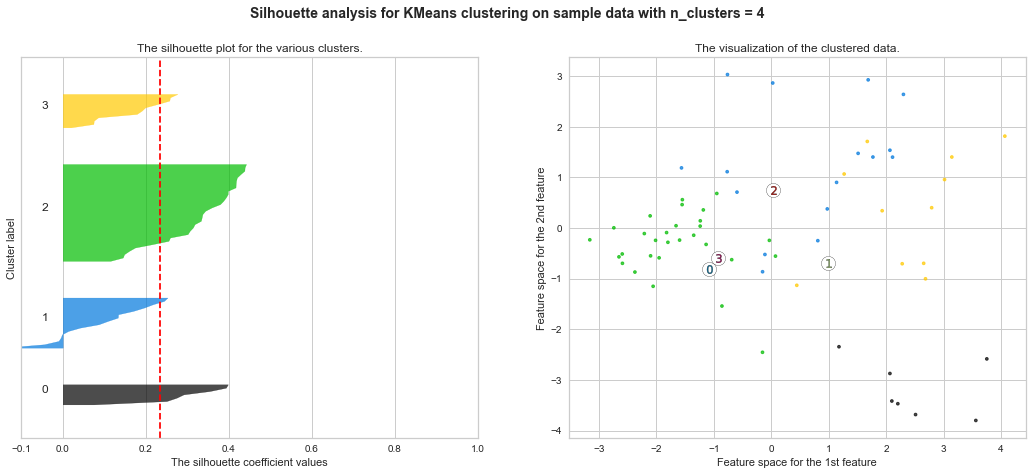

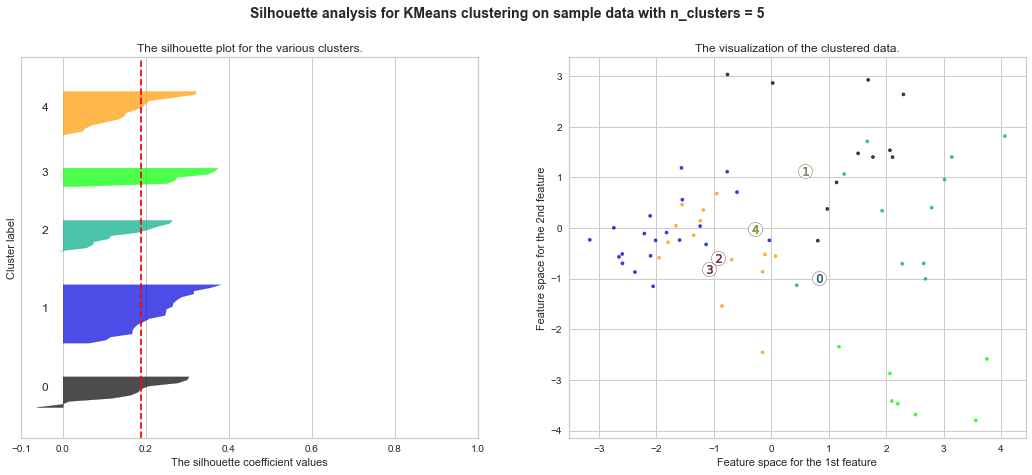

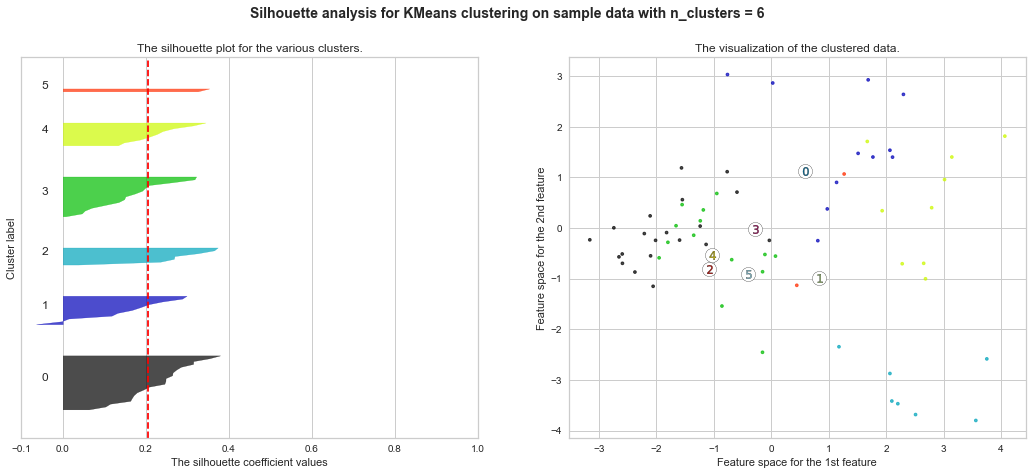

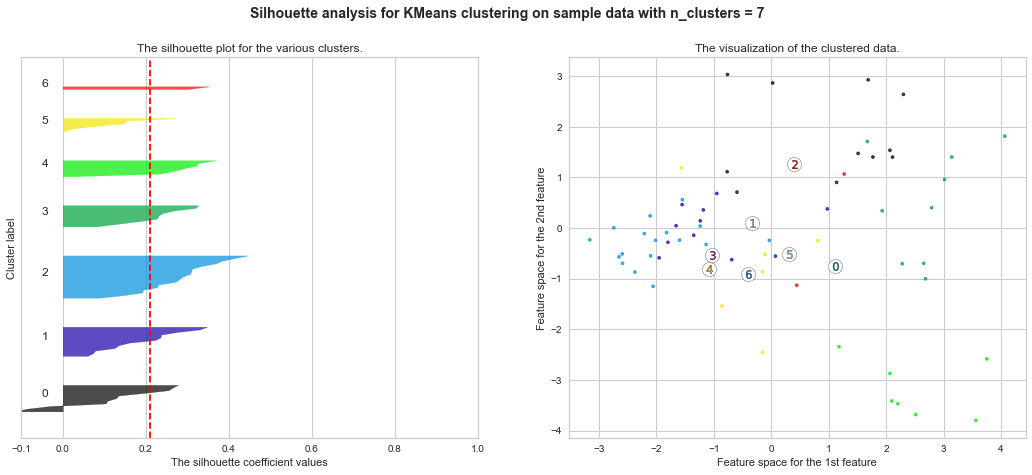

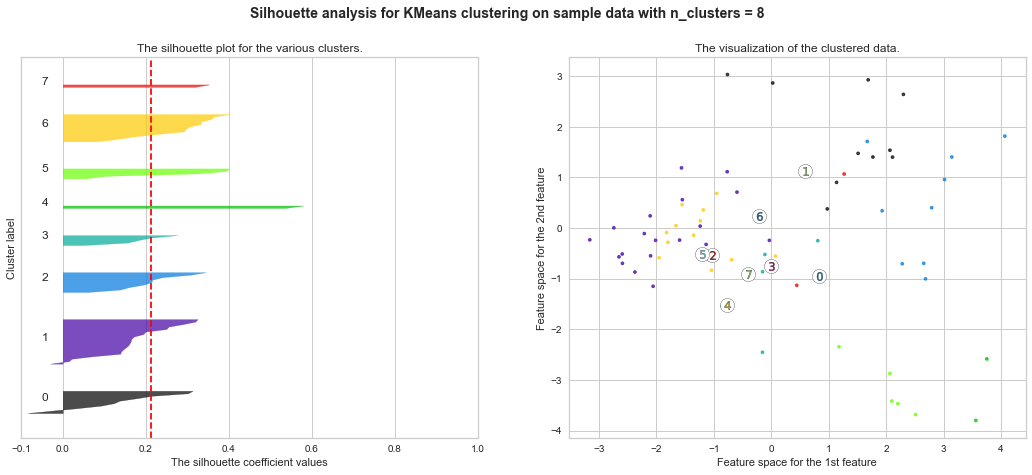

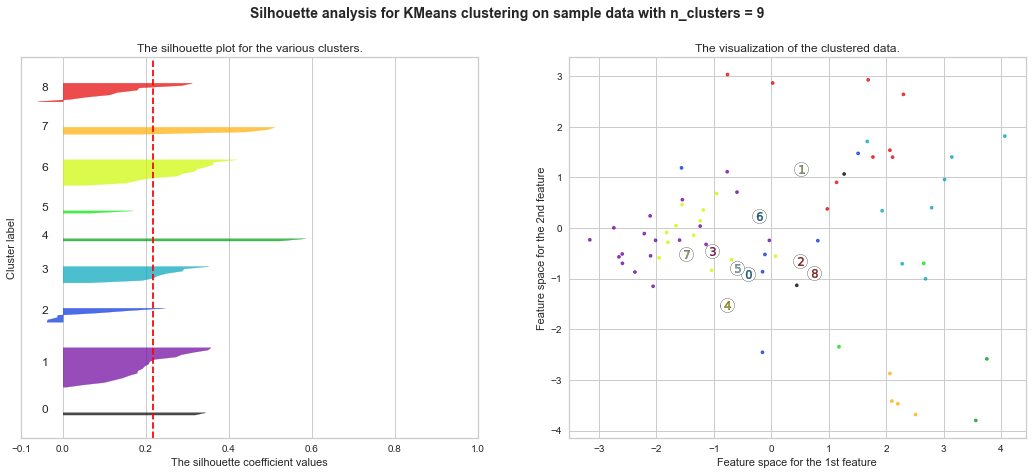

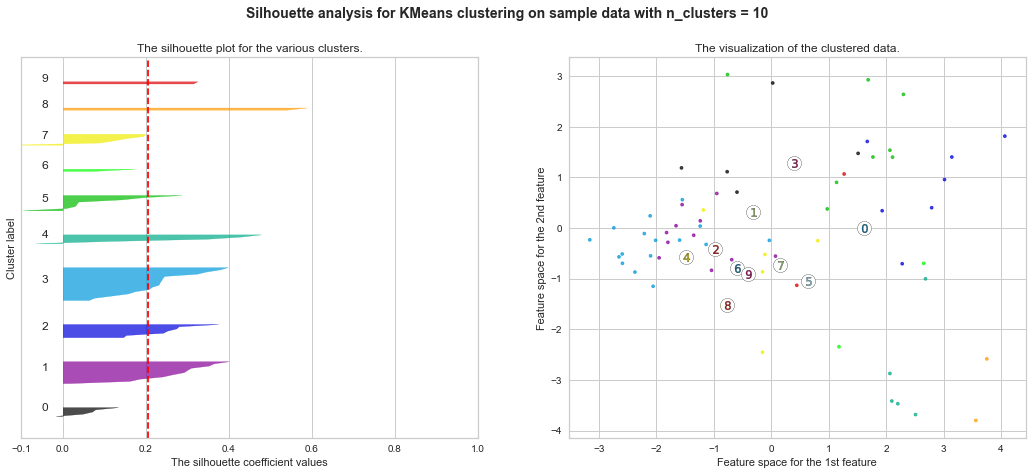

In [7]:
range_n_clusters = list(range(max(min(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)-2,2),max(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=100, max_iter=10000, algorithm="elkan")
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

[4, 5, 6, 7, 8, 9, 10]

For n_clusters = 4 The average silhouette_score is : 0.24252787844546206
For n_clusters = 5 The average silhouette_score is : 0.18872212139091113
For n_clusters = 6 The average silhouette_score is : 0.19608937080946381
For n_clusters = 7 The average silhouette_score is : 0.19946134385476397
For n_clusters = 8 The average silhouette_score is : 0.19656670737316306
For n_clusters = 9 The average silhouette_score is : 0.20999883918597093
For n_clusters = 10 The average silhouette_score is : 0.20143035235389456


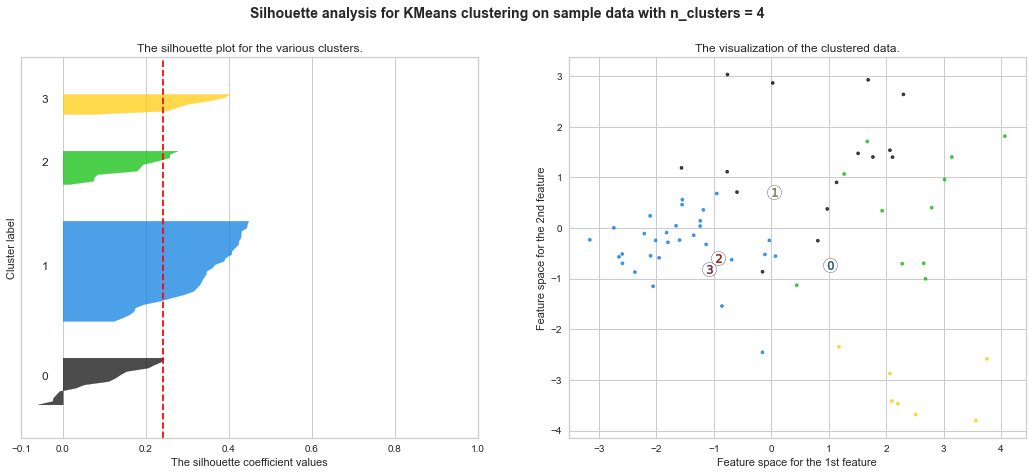

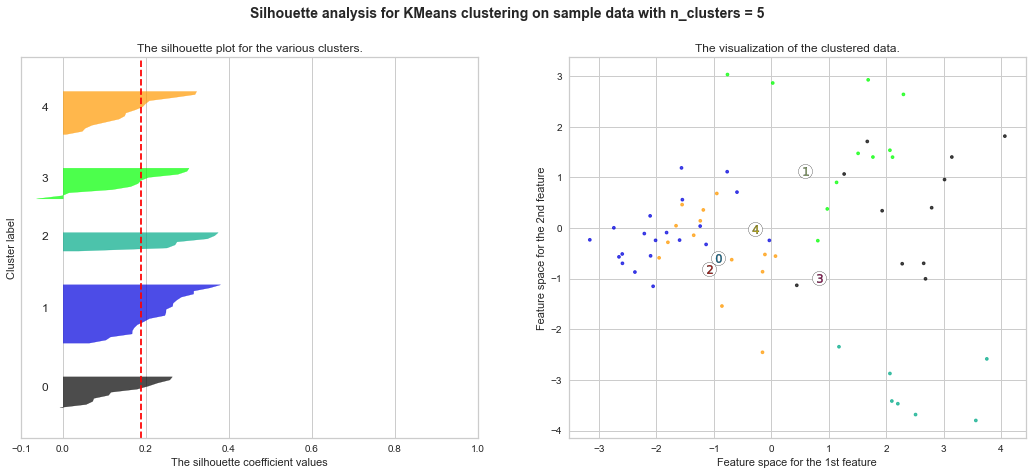

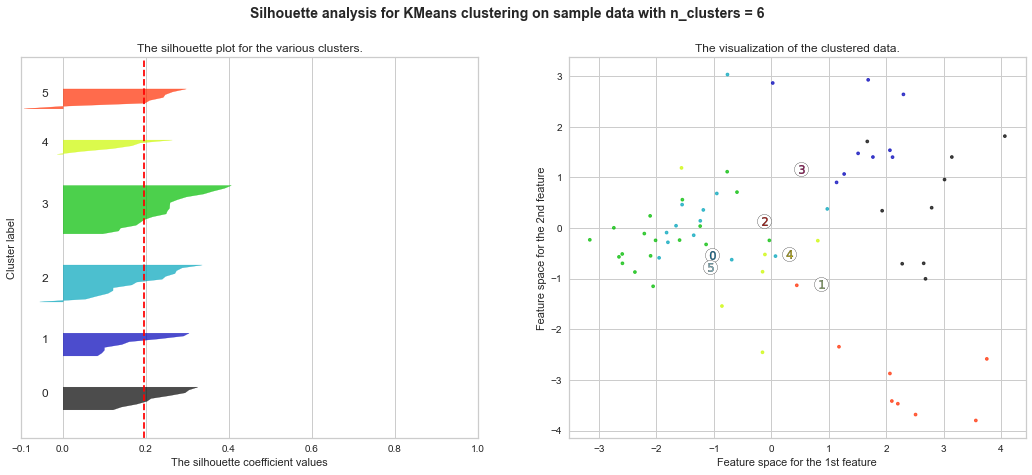

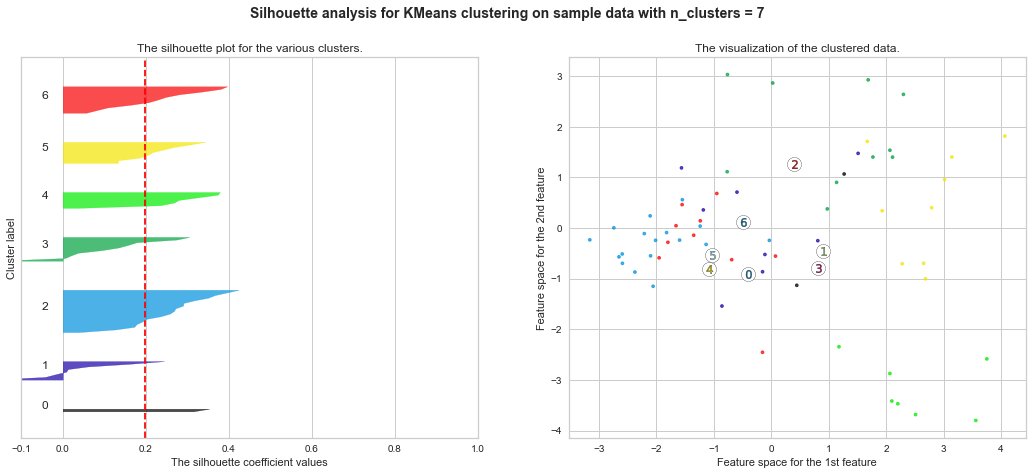

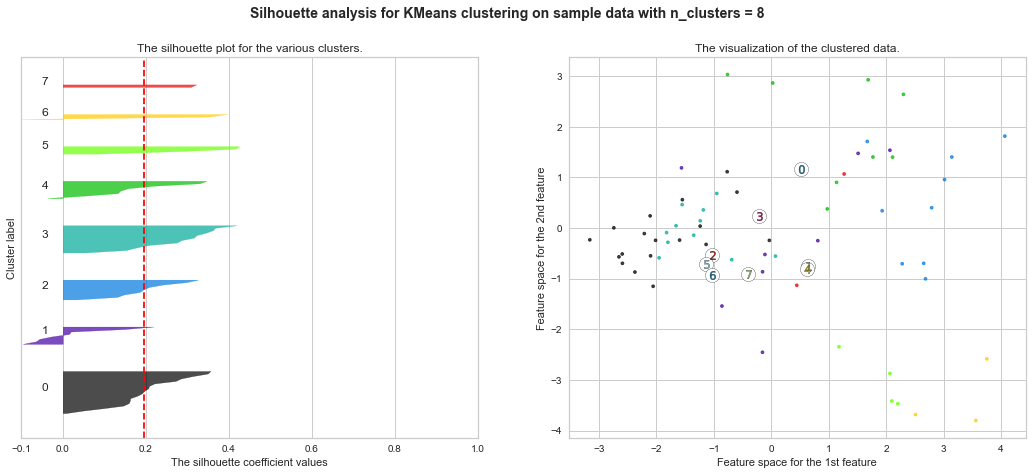

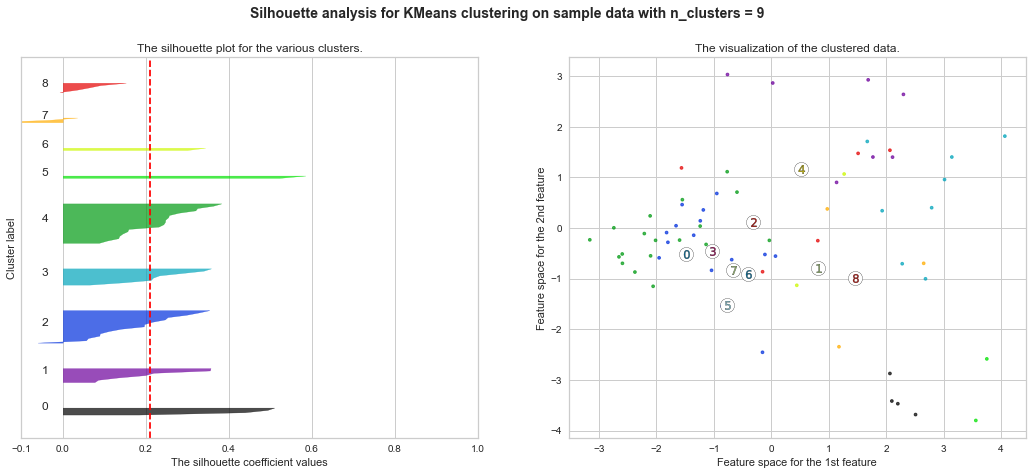

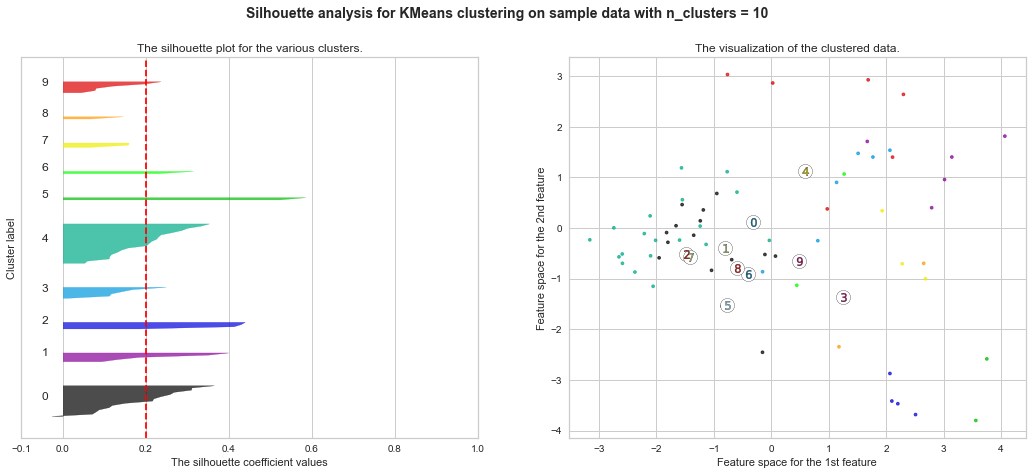

In [8]:
range_n_clusters = list(range(max(min(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)-2,2),max(kmeans_visualizer1.elbow_value_,kmeans_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

ELBOW METHOD - KMEDOIDS

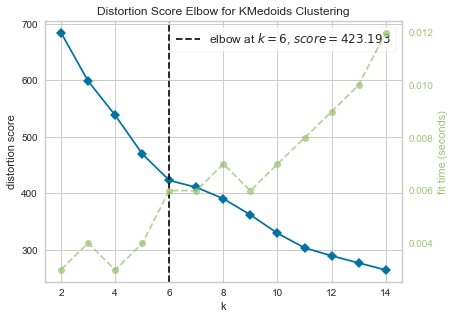

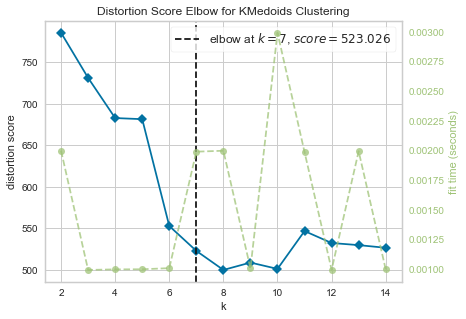

'visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure\n\nvisualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")\nvisualizer.fit(data_arr)        # Fit the data to the visualizer\nvisualizer.show()        # Finalize and render the figure'

In [9]:
'''distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=100, max_iter=10000) # , algorithm="elkan")
    kmeanModel.fit(data_arr)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()'''

kmed_visualizer1 = KElbowVisualizer(KMedoids(metric="cosine", init="heuristic", max_iter=10000, method="pam"), k=(2,15))
kmed_visualizer1.fit(data_arr)        # Fit the data to the visualizer
kmed_visualizer1.show()        # Finalize and render the figure

kmed_visualizer2 = KElbowVisualizer(KMedoids(), k=(2,15))
kmed_visualizer2.fit(data_arr)        # Fit the data to the visualizer
kmed_visualizer2.show()        # Finalize and render the figure

'''visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="calinski_harabasz")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer = KElbowVisualizer(KMeans(n_init=100, max_iter=10000, algorithm="elkan"), k=(2,15), metric="silhouette")
visualizer.fit(data_arr)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure'''

[4, 5, 6, 7, 8]

For n_clusters = 4 The average silhouette_score is : 0.14648705181781668
For n_clusters = 5 The average silhouette_score is : 0.16507897197517063
For n_clusters = 6 The average silhouette_score is : 0.17998358080917065
For n_clusters = 7 The average silhouette_score is : 0.13563237232656805
For n_clusters = 8 The average silhouette_score is : 0.14284033079466424


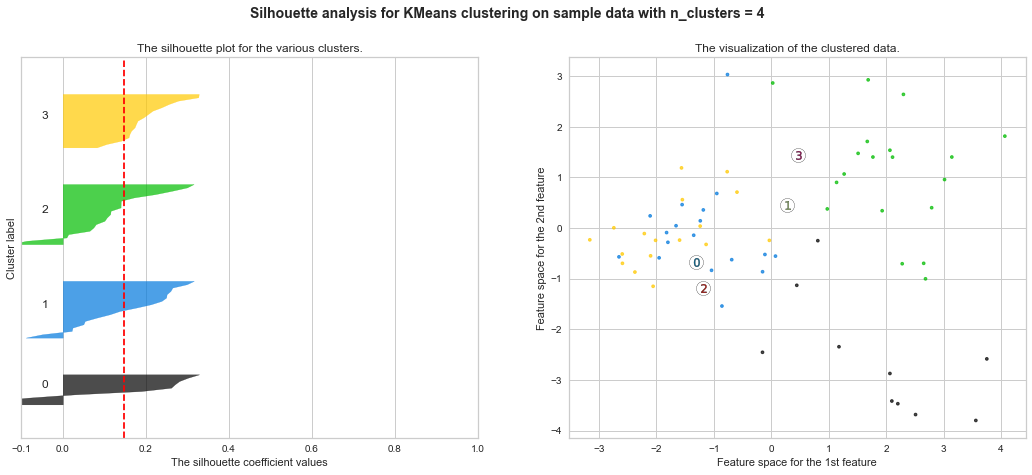

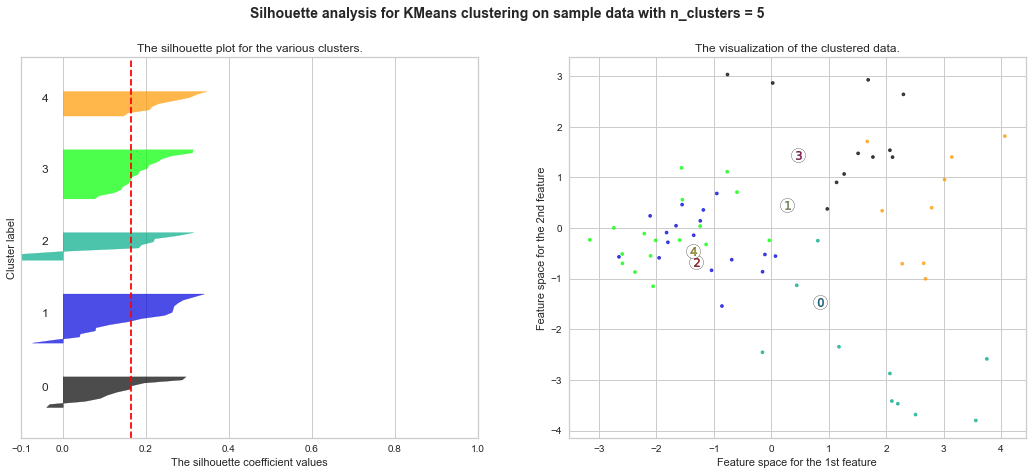

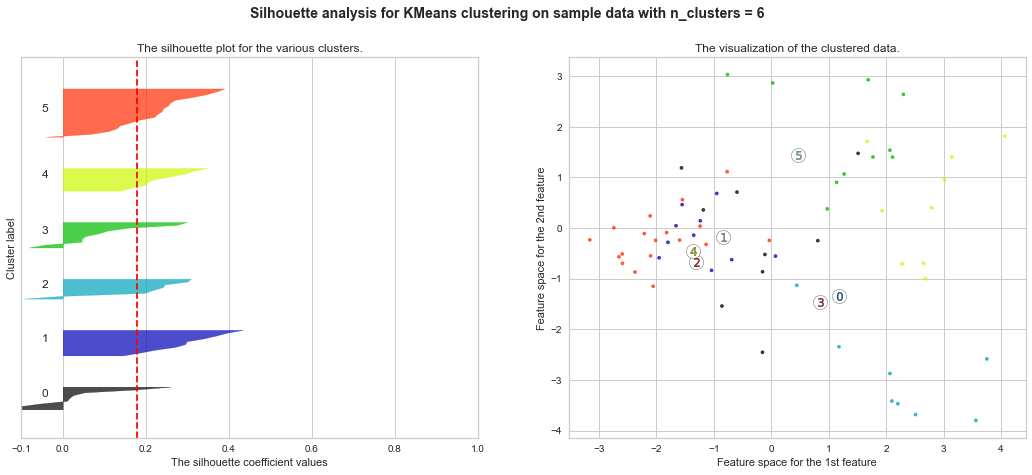

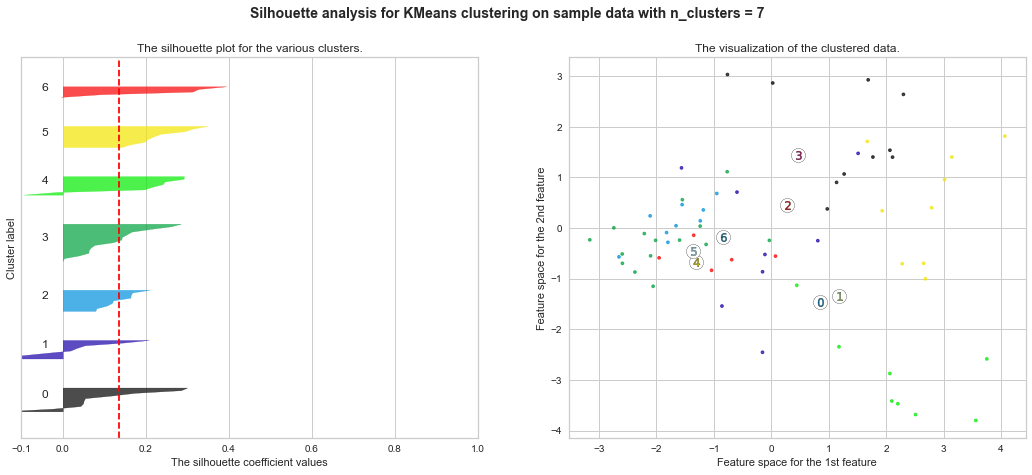

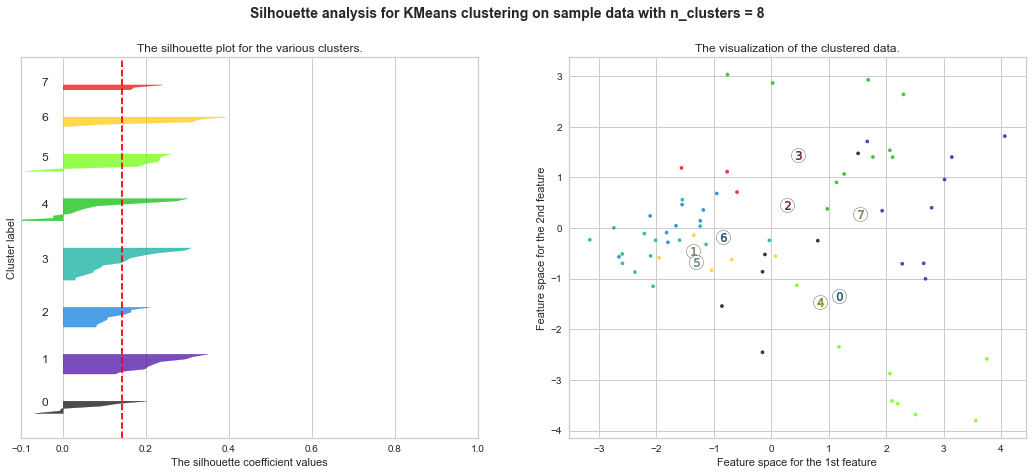

In [10]:
range_n_clusters = list(range(max(min(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)-2,2),max(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters, metric="cosine", init="heuristic", max_iter=10000, method="pam")
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

[4, 5, 6, 7, 8]

For n_clusters = 4 The average silhouette_score is : 0.03759605007054978
For n_clusters = 5 The average silhouette_score is : 0.015552192895354554
For n_clusters = 6 The average silhouette_score is : 0.048931141500707126
For n_clusters = 7 The average silhouette_score is : 0.0496635443791905
For n_clusters = 8 The average silhouette_score is : 0.034733402870446115


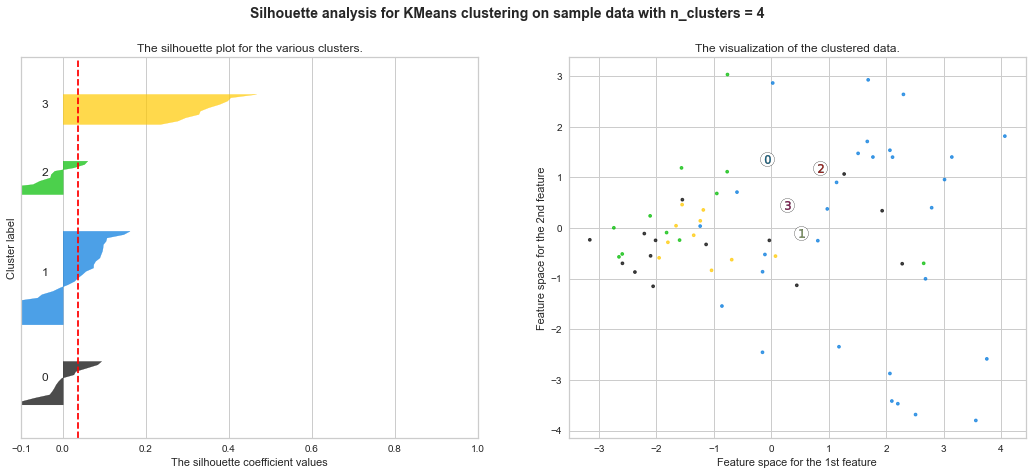

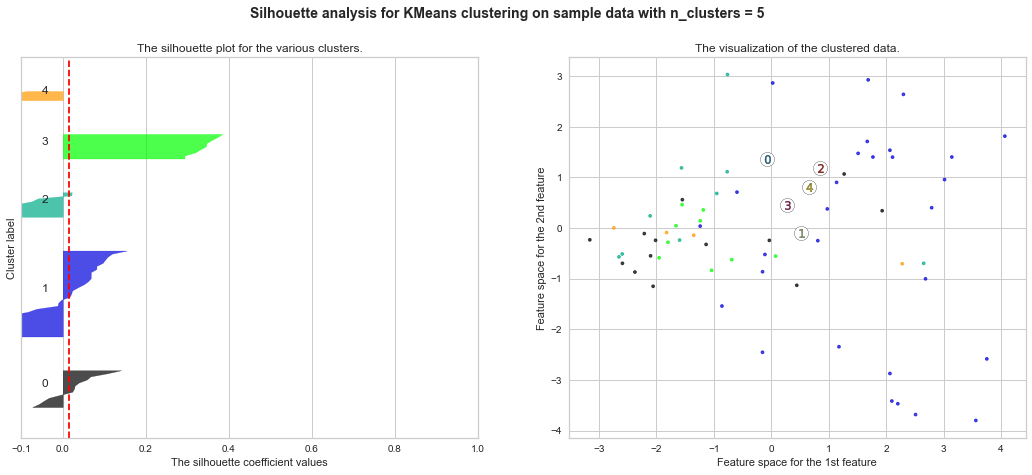

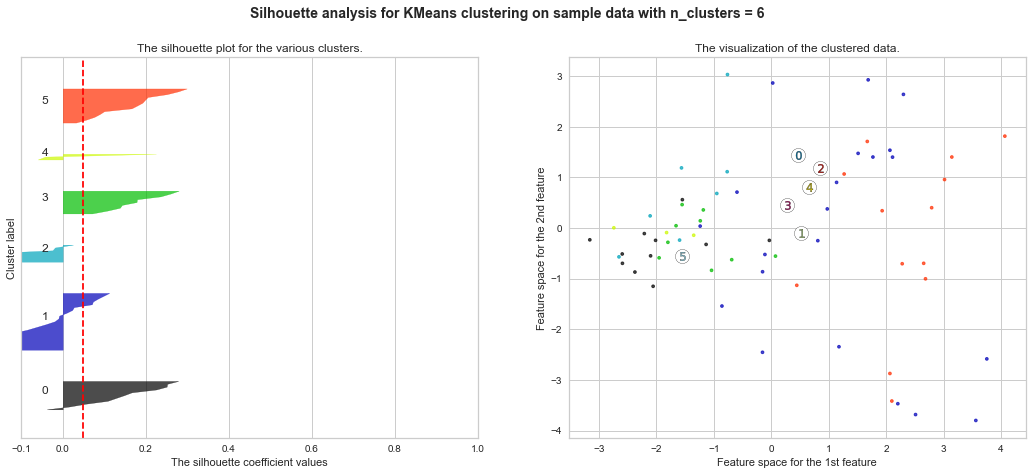

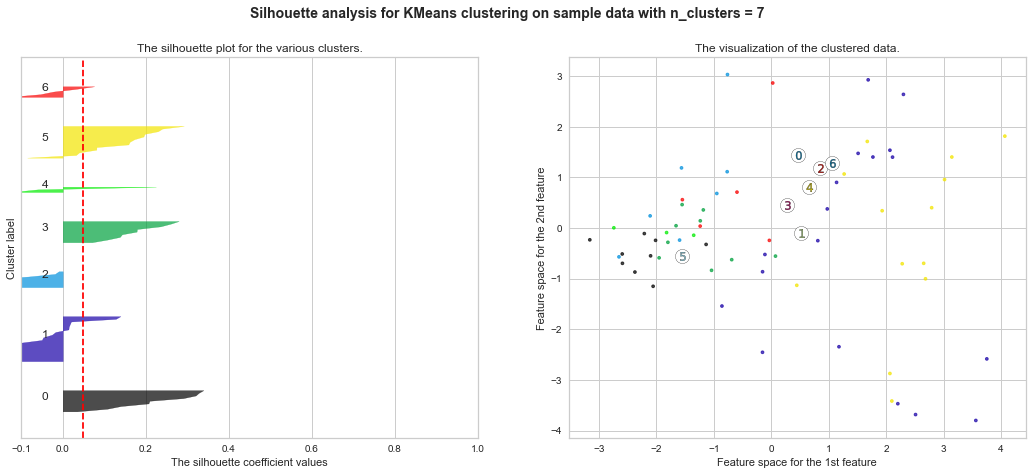

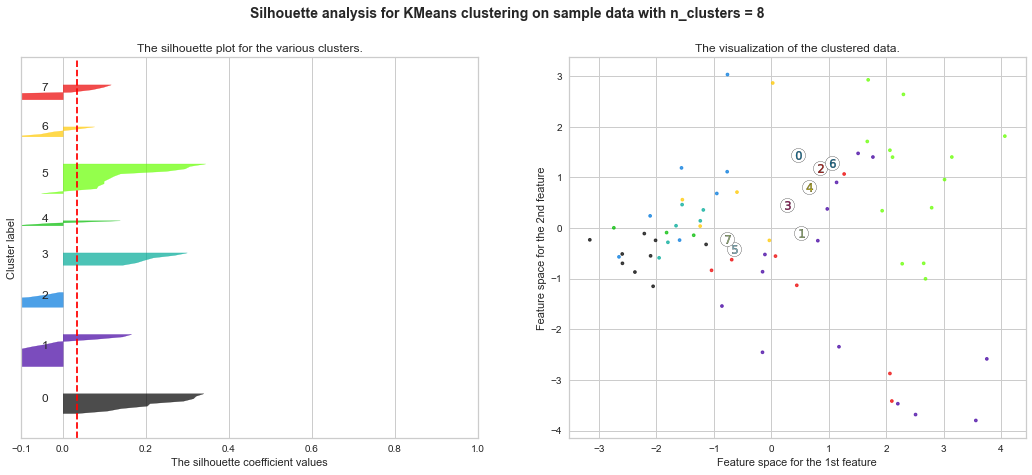

In [11]:
range_n_clusters = list(range(max(min(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)-2,2),max(kmed_visualizer1.elbow_value_,kmed_visualizer2.elbow_value_)+2))
display(range_n_clusters)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_arr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMedoids(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(data_arr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_arr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_arr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_arr_2d[:, 0], data_arr_2d[:, 1], marker=".", s=30, lw=1, alpha=0.7, c=colors, edgecolor=colors
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=75, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

X-MEANS METHOD

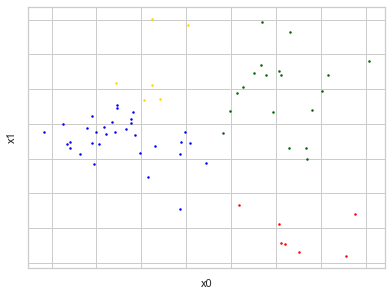

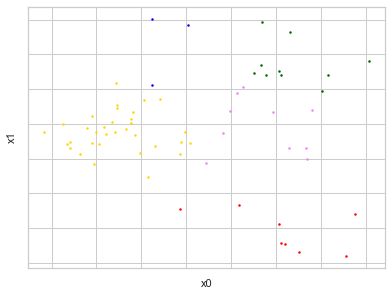

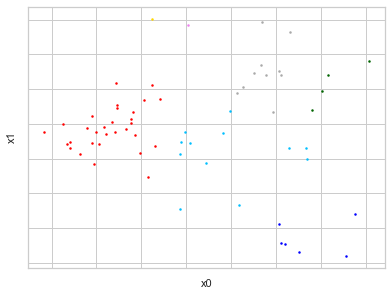

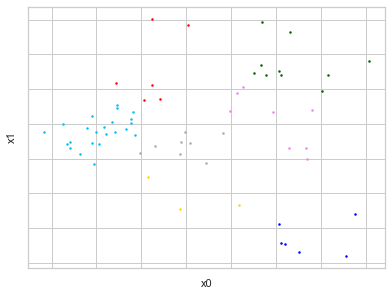

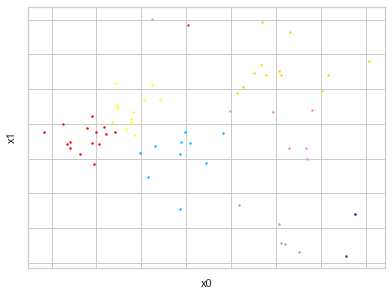

In [12]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.xmeans import xmeans

# load 4D data sample 'Iris'
sample_4d = list(data_arr_2d) # read_sample(FAMOUS_SAMPLES.SAMPLE_IRIS)
# display(sample_4d)
# initialize 3 initial centers using K-Means++ algorithm
for n in range_n_clusters:    
    centers = kmeans_plusplus_initializer(sample_4d, n).initialize()
    # performs cluster analysis using X-Means
    xmeans_instance = xmeans(sample_4d, centers)
    xmeans_instance.process()
    clusters = xmeans_instance.get_clusters()
    # display(clusters)
    # visualize obtained clusters in multi-dimensional space
    visualizer = cluster_visualizer_multidim()
    visualizer.append_clusters(clusters, sample_4d)
    visualizer.show(max_row_size=5) # max_row_size=3)